<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-1/blob/main/Homework_1_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1
#Problem 2
#Name: Ahmed Elshazly
#Student ID:801420724

```
# This is formatted as code
```



         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
Final value of theta = [ 5.31392989 -2.00368575  0.53260255 -0.26556708]
cost_history = [4.35632837 3.99754934 3.73994659 ... 0.73846424 0.73846424 0.73846424]


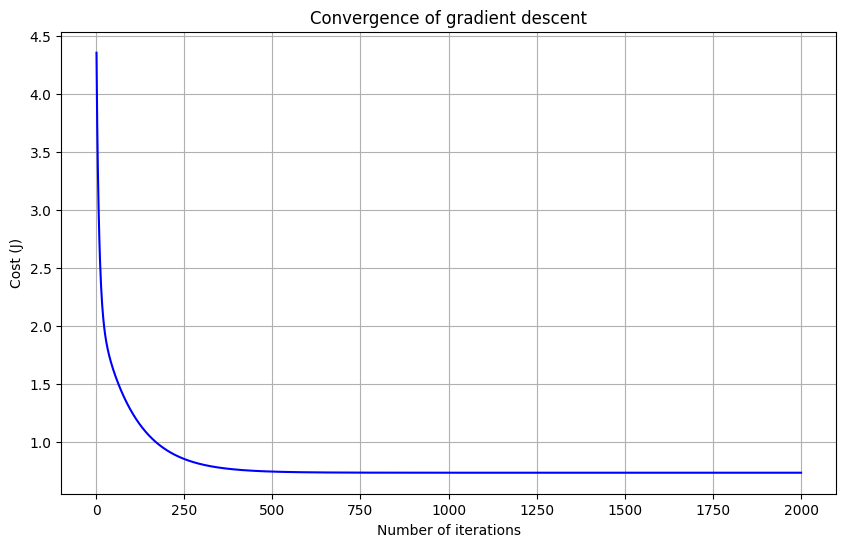

x:[[1. 1. 1. 1.]
 [1. 2. 0. 4.]
 [1. 3. 2. 1.]]
 predicted y:[3.5772796  0.24429005 0.10251065]


In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/D3.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

X1 = df.values[:, 0]  # get input values from first column -- X1
X2=df.values[:, 1]# get input values from  second column -- X2
X3=df.values[:, 2]  #get input values from  third column -- X2
y = df.values[:, 3]  # get output values from second column -- Y
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X_0 = np.ones((m, 1))  # create a column with all ones, which represents the x0 values
X_1 = X1.reshape(m, 1) #reshape the x1 data to be in a column.
X_2=  X2.reshape(m, 1) #reshape the x2 data to be in a column.
X_3=  X3.reshape(m, 1)  #reshape the x3 data to be in a column.
X = np.hstack((X_0, X_1,X_2,X_3))  #merge the x0, x1, x2 and x3 columns in a single matrix

theta = np.zeros(4) #initialize the theta vector to be zero and it has 4 elements because we have 3 inputs(x1,x2 and x3) beside the x0 vector.

#Defining the cost computational function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)       # the predicted values are achieved by multiplying the X matrix by the theta column
    errors = np.subtract(predictions, y) # error is calculated by subtracting the predicted values from the ground truth values
    sqrErrors = np.square(errors)      # squaring the errors because we work with convex cost function
    J = 1 / (2 * m) * np.sum(sqrErrors) #cost calculation based on the cost function mentioned in lectures
    return J

# defining the gradient descent algorithm
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)
    cost_history = np.zeros(iterations)  #initialize the cost history array to have zeros which will be updated during training

    for i in range(iterations):          # loop over the number of iterations to update the parameters theta, and calculate thre cost
        predictions = X.dot(theta)       # calculate the predictions after multypling X by theta
        errors = np.subtract(predictions, y)   #subtract the predictions from the ground truth
        theta -= (alpha / m) * X.transpose().dot(errors) # parametres update according to lecture to get the new parameters with alpha is considered the learning rate
        cost_history[i] = compute_cost(X, y, theta)  #calculate the cost for every iteration, by applying X matrix, theta, and ground truth y to get the cost

    return theta, cost_history

theta = [0., 0., 0., 0.]
iterations = 2000
alpha = 0.05  #the learning rate

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations) #apply the gradient descent function
print('Final value of theta =', theta)
print('cost_history =', cost_history)

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

Xtest=np.array([[1,1,1],[2,0,4],[3,2,1]])  # this matrix is constructed based on the given three samples for x1,x, and x3 in the homework.
X0_test= np.ones((3, 1)) #three samples of ones for x0 are needed because we have 3 samples for x1, x2 and x3.
Xtest_total = np.hstack((X0_test, Xtest)) #caocatenate or merge x0 with x1, x2 and x3 in a single matrix
print("x:{}".format(Xtest_total))
test_predictions=Xtest_total.dot(theta)  #calculate the predictions after multypling X matrix by theta column
print(" predicted y:{}".format(test_predictions))
